In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import mixture

import sys
sys.path.append("G:\\Anaconda3\\Project\\airservicesanu\\Preprocessing")
sys.path.append("G:\\Anaconda3\\Project\\airservicesanu\\Visualization")
from Data_Preprocess import *
from Visualize import *

import Linear_Transformation

In [2]:
# read in matrix & normalization
data_path = "../../Data/odas_ids_full_2.csv"
flight_No, flight_matrix = read_in_asmatrix(path=data_path, read_in_method='discard', basis_functions=basis_functions)
flight_No, raw_matrix = read_in_asmatrix(path=data_path, read_in_method='expand')
norm_matrix = feature_normalization(flight_matrix, method='min_max')

In [3]:
# get cluster centers
cluster_num = 6
gmm = mixture.GaussianMixture(n_components = cluster_num)
gmm.fit(norm_matrix)
gmm_clustering = gmm.predict(norm_matrix)

mean_route = []
for i in range(cluster_num):
    mean_route.append(np.array(raw_matrix[np.where(gmm_clustering == i)].mean(axis=0))[0])
mean_route = np.array(mean_route)

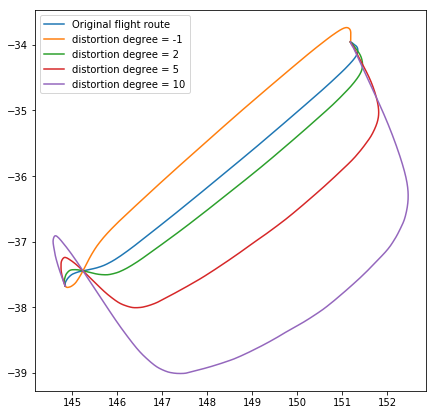

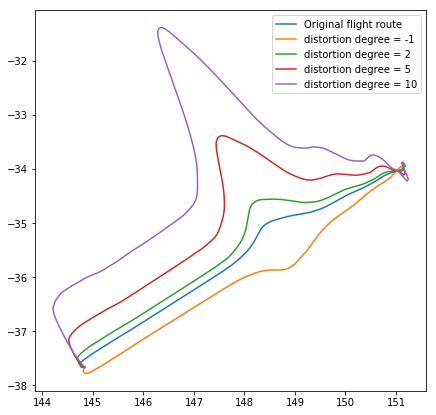

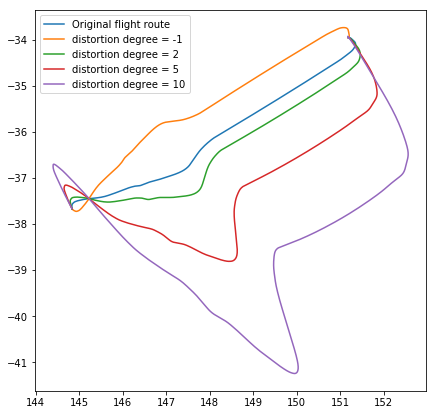

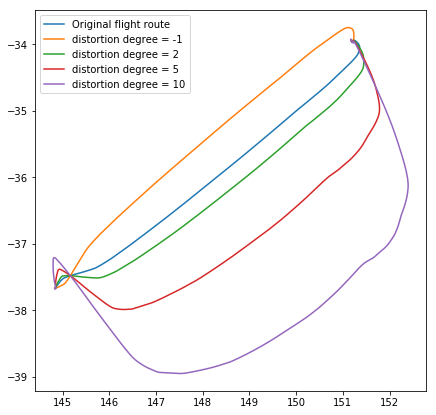

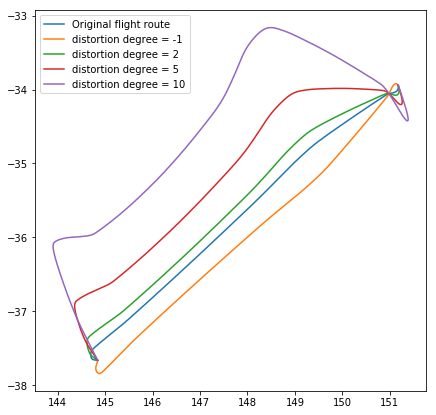

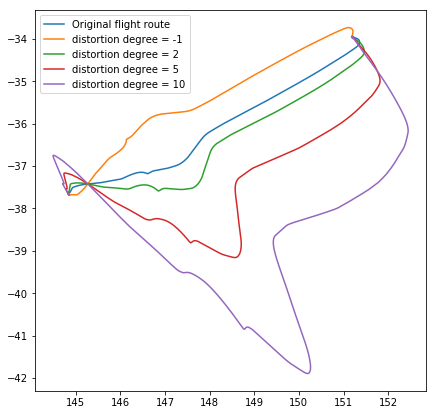

In [4]:
# compare: original route vs. distorted route (with different distortion degree)
for route in mean_route:
    plt.figure(figsize=(7,7))
    
    route_matrix = route.reshape(-1,7)
    plt.plot(route_matrix[:,1], route_matrix[:,2], label="Original flight route")

    for degree in [-1, 2, 5, 10]:
        distorted_route = Linear_Transformation.distort_route(route.reshape(-1,7), degree)
        plt.plot(distorted_route[:,1], distorted_route[:,2], label= "distortion degree = " + str(degree))
    
    plt.legend()
    plt.show()